In [1]:
from konlpy.tag import Okt
okt=Okt()

In [2]:
okt.morphs("설치가 잘 되었는지 확인해봅시다.")

['설치', '가', '잘', '되었는지', '확인', '해봅시다', '.']

In [3]:
!pip install nltk

In [5]:
!pip install wordcloud

In [25]:
import nltk
from nltk import pos_tag
import pickle
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [49]:
text = "회무침 회무침 회무침 회무침 회무침 회무침 전 전 전 전 전 전 청량미 청량미 청량미 청량미 청량미 청량미 감칠맛 감칠맛 감칠맛 감칠맛 감칠맛 감칠맛 1000억 유산균 막걸리 탁주 국내산쌀, 누룩 5% 5% 5% 5% 5% 5% 5% 5% 750ml 2021 대한민국 주류대상 우리술 탁주 생막걸리 부문 3년 연속 대상 1000억 유산균 막걸리는 국순당이 최초로 선보인 유산균 강화 막걸리다. 식물성 유산균이 막걸리 한 병(750mL)에 1000억 마리 이상이 들어 있다. 시중에 판매되는 일반 생막걸리 한 병(자사 생막걸리 750mL 기준)당 1억 마리 가량의 유산균이 들어 있는 것과 비교하면 약 1000배 많이 들어있고, 일반 유산균음료 보다 약 100배 많이 들어 있다.적당한 감칠맛과 청량미가 있어 전, 회무침과 잘 어울린다."
text

'회무침 회무침 회무침 회무침회무침 회무침 전 전 전 전 전 전 청량미 청량미 청량미 청량미 청량미 청량미 감칠맛 감칠맛 감칠맛 감칠맛 감칠맛 감칠맛 1000억 유산균 막걸리 탁주 국내산쌀, 누룩 5% 5% 5% 5% 5% 5% 5% 5% 750ml 2021 대한민국 주류대상 우리술 탁주 생막걸리 부문 3년 연속 대상 1000억 유산균 막걸리는 국순당이 최초로 선보인 유산균 강화 막걸리다. 식물성 유산균이 막걸리 한 병(750mL)에 1000억 마리 이상이 들어 있다. 시중에 판매되는 일반 생막걸리 한 병(자사 생막걸리 750mL 기준)당 1억 마리 가량의 유산균이 들어 있는 것과 비교하면 약 1000배 많이 들어있고, 일반 유산균음료 보다 약 100배 많이 들어 있다.적당한 감칠맛과 청량미가 있어 전, 회무침과 잘 어울린다.'

In [50]:
def extract_pos(text):
    pos_word = okt.pos(text, stem = True, norm = True)
    
    stopwords=['하다', '은', '는', '이', '인', '로', '의', '등', '또', '보다']

    word_list = []
    for word, tag in pos_word:
        if tag in ['Noun', 'Number']:
            if word not in stopwords:
                word_list.append(word)
    return word_list

In [51]:
result = extract_pos(text)
result

['회',
 '회',
 '회',
 '회',
 '무침회',
 '회',
 '전',
 '전',
 '전',
 '전',
 '전',
 '전',
 '청량미',
 '청량미',
 '청량미',
 '청량미',
 '청량미',
 '청량미',
 '감칠맛',
 '감칠맛',
 '감칠맛',
 '감칠맛',
 '감칠맛',
 '감칠맛',
 '1000억',
 '유산균',
 '막걸리',
 '탁주',
 '국내',
 '산쌀',
 '누룩',
 '5%',
 '5%',
 '5%',
 '5%',
 '5%',
 '5%',
 '5%',
 '5%',
 '750',
 '2021',
 '대한민국',
 '주류',
 '대상',
 '우리',
 '술',
 '탁주',
 '생',
 '막걸리',
 '부문',
 '3년',
 '연속',
 '대상',
 '1000억',
 '유산균',
 '막걸리',
 '국순당',
 '최초',
 '유산균',
 '강화',
 '막걸리',
 '식물성',
 '유산균',
 '막걸리',
 '병',
 '750',
 '1000억',
 '마리',
 '이상',
 '시중',
 '판매',
 '일반',
 '생',
 '막걸리',
 '병',
 '자사',
 '생',
 '막걸리',
 '750',
 '기준',
 '당',
 '1억',
 '마리',
 '가량',
 '유산균',
 '것',
 '비교',
 '약',
 '1000',
 '배',
 '일반',
 '유산균',
 '음료',
 '약',
 '100',
 '배',
 '감칠맛',
 '청량미',
 '전',
 '회']

In [52]:
count = Counter(result)
count

Counter({'회': 6,
         '무침회': 1,
         '전': 7,
         '청량미': 7,
         '감칠맛': 7,
         '1000억': 3,
         '유산균': 6,
         '막걸리': 7,
         '탁주': 2,
         '국내': 1,
         '산쌀': 1,
         '누룩': 1,
         '5%': 8,
         '750': 3,
         '2021': 1,
         '대한민국': 1,
         '주류': 1,
         '대상': 2,
         '우리': 1,
         '술': 1,
         '생': 3,
         '부문': 1,
         '3년': 1,
         '연속': 1,
         '국순당': 1,
         '최초': 1,
         '강화': 1,
         '식물성': 1,
         '병': 2,
         '마리': 2,
         '이상': 1,
         '시중': 1,
         '판매': 1,
         '일반': 2,
         '자사': 1,
         '기준': 1,
         '당': 1,
         '1억': 1,
         '가량': 1,
         '것': 1,
         '비교': 1,
         '약': 2,
         '1000': 1,
         '배': 2,
         '음료': 1,
         '100': 1})

In [53]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc',
                     width = 500,
                     height = 500,
                     background_color = 'white',
                     colormap = 'magma',
                     random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

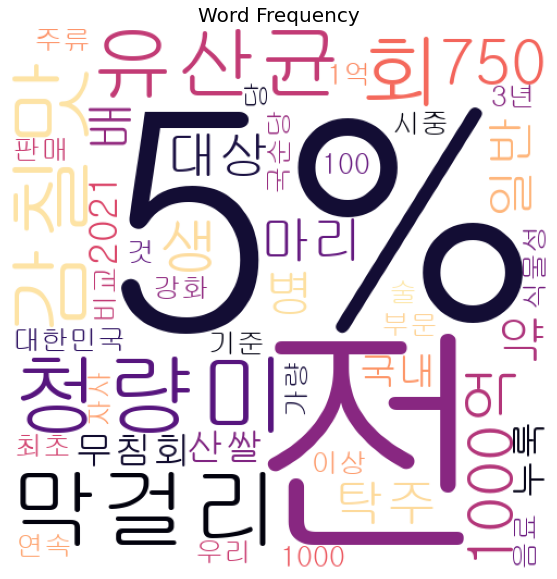

In [54]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 20)
plt.show